## Week 10 - Regression from-the-scratch

In this week, we will teach you how to implement regression model from-the-scratch. In this week, a mathematical derivation of regression will be carried in the class before hands-on. Then, you are expected to implement the final derivation formula into a python code.

#### Used Data 

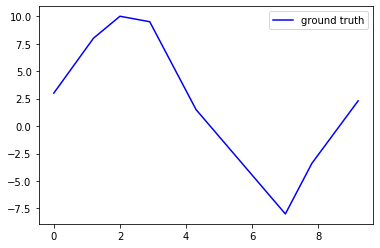

In [154]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

x = np.array([0,1.2,2,2.9,4.3,7,7.8,9.2]) # input of regression model
y = np.array([3,8,10,9.5,1.5,-8,-3.4,2.3]) # target (ground truth) 
                                           # of regression model

plt.figure("original data")
plt.plot(x,y,c='blue',label='ground truth')
plt.legend()
plt.show()

**Notes:** before you start to answer Q01-Q04, we want to inform that you may make fuctions to certain task to be used in Q01-Q04, since they are basically quite similar.

## Q01
a. Make a linear regression model, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week09 - Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in Q01.a.<br>
c. Plot prediction output you get in Q01.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [155]:
def regression(X, y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, y)
    regression_coef = np.dot(np.linalg.inv(A), B)
    return regression_coef

In [156]:
bias = np.ones(len(x))
x_orde_1 = np.concatenate((np.array([bias]), np.array([x]))).T

coef_orde_1 = regression(x_orde_1, y)
y_pred = np.dot(x_orde_1, coef_orde_1)
print(y_pred)

[ 8.10697402  6.64339987  5.66768378  4.57000317  2.8625     -0.43054183
 -1.40625792 -3.11376109]


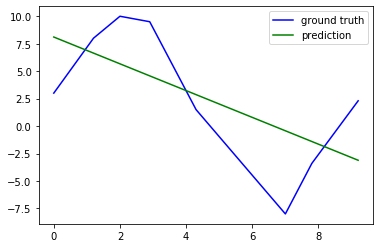

In [157]:
plt.figure("linear regression")
plt.plot(x,y,c='blue',label='ground truth')
plt.plot(x,y_pred,c='green',label='prediction')
plt.legend()
plt.show()

## Q02 (same with Q01, but 2nd order polynomial)
a. Make a polynomial regression model with $order=2$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week09 - Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in Q02.a.<br>
c. Plot prediction output you get in Q02.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [158]:
x_orde_2 = np.concatenate((x_orde_1.T, np.array([x**2]))).T
print(x_orde_2)

[[ 1.    0.    0.  ]
 [ 1.    1.2   1.44]
 [ 1.    2.    4.  ]
 [ 1.    2.9   8.41]
 [ 1.    4.3  18.49]
 [ 1.    7.   49.  ]
 [ 1.    7.8  60.84]
 [ 1.    9.2  84.64]]


In [159]:
coef_orde_2 = regression(x_orde_2, y)
y_pred = np.dot(x_orde_2, coef_orde_2)
print(y_pred)

[ 8.14981621  6.65054433  5.65689886  4.54466005  2.82632239 -0.44700757
 -1.40661215 -3.07462213]


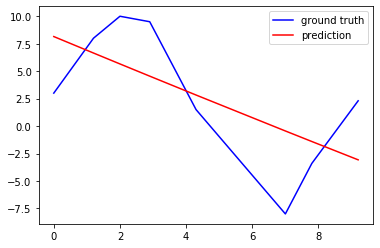

In [160]:
plt.figure("linear regression")
plt.plot(x,y,c='blue',label='ground truth')
plt.plot(x,y_pred,c='red',label='prediction')
plt.legend()
plt.show()

## Q03 (same with Q02, but 4th order polynomial)
a. Make a polynomial regression model with $order=4$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week09 - Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in Q03.a.<br>
c. Plot prediction output you get in Q03.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [161]:
x_orde_3 = np.concatenate((x_orde_2.T, np.array([x**3]))).T
x_orde_4 = np.concatenate((x_orde_3.T, np.array([x**4]))).T
print(x_orde_4)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.2000000e+00 1.4400000e+00 1.7280000e+00 2.0736000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01]
 [1.0000000e+00 2.9000000e+00 8.4100000e+00 2.4389000e+01 7.0728100e+01]
 [1.0000000e+00 4.3000000e+00 1.8490000e+01 7.9507000e+01 3.4188010e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03]
 [1.0000000e+00 7.8000000e+00 6.0840000e+01 4.7455200e+02 3.7015056e+03]
 [1.0000000e+00 9.2000000e+00 8.4640000e+01 7.7868800e+02 7.1639296e+03]]


In [162]:
coef_orde_4 = regression(x_orde_4, y)
print(coef_orde_4)

y_pred = np.dot(x_orde_4, coef_orde_4)
print(y_pred)

[ 2.54367257e+00  9.43468387e+00 -3.49267218e+00  3.19584309e-01
 -5.56615726e-03]
[ 2.54367257  9.37654498  9.90996756  7.93154077  2.03953591 -6.30140265
 -5.30375782  2.70389867]


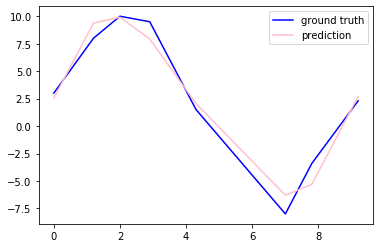

In [163]:
plt.figure("linear regression")
plt.plot(x,y,c='blue',label='ground truth')
plt.plot(x,y_pred,c='pink',label='prediction')
plt.legend()
plt.show()

## Q04 (same with Q03, but with regularization)
a. Make a **regularized** polynomial regression model with $order=4$ and regularization constant $\lambda=0.5$ (find the regression coefficient $\mathbf{a}$).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in Q04.a.<br>
c. Plot prediction output you get in Q04.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and grount truth)

In [164]:
def regularized_regression(X, y, regu_const):
    A = np.dot(X.T, X)
    regu_matrix = regu_const * np.identity(len(A))
    B = np.dot(X.T, y)

    regression_coef = np.dot(np.linalg.inv(A + regu_matrix), B)
    return regression_coef

In [177]:
regu_const = 0.5
coef_orde_4_regu = regularized_regression(x_orde_4, y, regu_const)

y_pred = np.dot(x_orde_4, coef_orde_4_regu)
print(y_pred)

[ 3.45119858  7.38789818  8.33133367  7.6841371   3.60990382 -6.21159923
 -6.09023584  3.01176443]


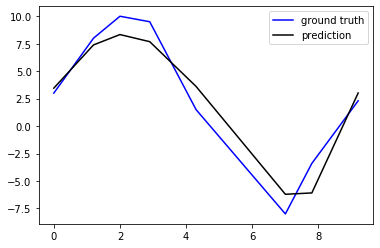

In [178]:
plt.figure("polynomial regression with regularization")
plt.plot(x,y,c='blue',label='ground truth')
plt.plot(x,y_pred,c='black',label='prediction')
plt.legend()
plt.show()